In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import geopandas
from matplotlib import pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from statistics import mean

/home/gautam/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv("../dataset/ML_5yr_dataset.csv")

In [3]:
df = df[df["Install_year"].notnull()].copy()

In [4]:
df["age"]=df["year"]-df["Install_year"]
df["years_since_break"]=df["year"]-df["last_break_yr"]

In [5]:
xcols = ["Install_year","CI","DI","SPUN","SAND","years_since_break","prior_breaks","age"]
ycol = "y"
df[ycol] = df[ycol].astype(int)
X_train, X_test, y_train, y_test = train_test_split(df[xcols], df[ycol], test_size=0.2, random_state = 63)

In [6]:
scores=[]
min_cross_val=[]
max_cross_val=[]
training=[]

In [7]:
from itertools import combinations

options=["Install_year","years_since_break","prior_breaks","age"]
material=["CI","DI","SPUN","SAND"]
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",LogisticRegression())
])

for j in range(1,len(options)+1):
    perm = combinations(options, j)
    for k in perm:
        col=list(k)+material
        pipe.fit(X_train[col],y_train)
        scores.append(pipe.score(X_test[col],y_test))
        min_cross_val.append(min(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
        max_cross_val.append(max(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
        training.append("Features: "+str(col)+" LogR")

Text(0.5, 1.0, 'Scores')

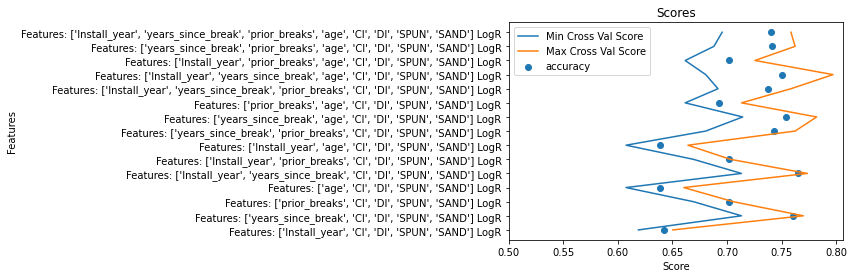

In [8]:
_,ax = plt.subplots()
ax.scatter(scores,training)
ax.plot(min_cross_val,training)
ax.plot( max_cross_val,training)
ax.set_xlim(0.5)
plt.legend(["Min Cross Val Score","Max Cross Val Score","accuracy"])
ax.set_xlabel('Score')
ax.set_ylabel('Features')
ax.set_title("Scores")

In [9]:
options.append("Material")

for i in range(1,4):
    for j in range(1,len(xcols)):
        perm = combinations(options, j)
        for k in perm:
            if "Material" in k:
                opt=list(k).remove("Material")
                if opt!=None:
                    poly=opt+material
                else:
                    poly=material
            else:
                poly=list(k)
            trans = make_column_transformer((PolynomialFeatures(degree=i), poly),
                                             remainder="passthrough"
                                            )

            pipe = Pipeline([
                             ("trans", trans),
                             ("scaler",StandardScaler()),
                            ("lr", LogisticRegression(max_iter=200)),
                           ])
            pipe.fit(X_train,y_train)
            scores.append(pipe.score(X_test,y_test))
            min_cross_val.append(min(cross_validate(pipe, X_train, y_train, cv=12)["test_score"]))
            max_cross_val.append(max(cross_validate(pipe, X_train, y_train, cv=12)["test_score"]))
            training.append(str(i)+" degree polynomial in "+str(poly)+" features: "+str(xcols)+" LogR")
            

In [10]:
col=xcols
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",LinearRegression())
])
pipe.fit(X_train[col],y_train)
scores.append(pipe.score(X_test[col],y_test))
min_cross_val.append(min(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
max_cross_val.append(max(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
training.append("Features: "+str(col)+" LR")

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
col=xcols
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",clf)
])
pipe.fit(X_train[col],y_train)
scores.append(pipe.score(X_test[col],y_test))
min_cross_val.append(min(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
max_cross_val.append(max(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
training.append("Features: "+str(col)+" DT")
pipe.score(X_test[col],y_test)

0.849435382685069

Text(0.5, 1.0, 'Scores')

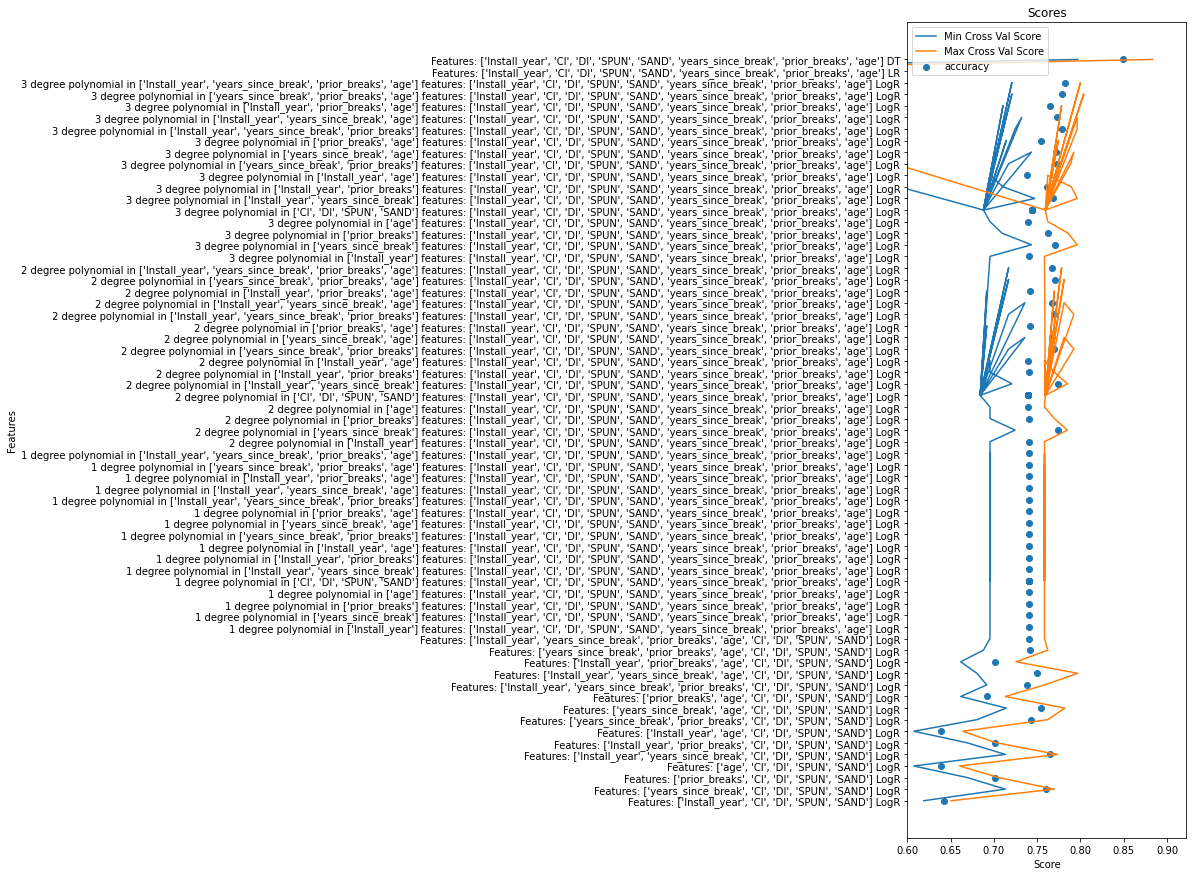

In [12]:
_,ax = plt.subplots(figsize=(5,15))
ax.scatter(scores,training)
ax.plot(min_cross_val,training)
ax.plot( max_cross_val,training)
ax.set_xlim(0.6)
plt.legend(["Min Cross Val Score","Max Cross Val Score","accuracy"])
ax.set_xlabel('Score')
ax.set_ylabel('Features')
ax.set_title("Scores")

In [13]:
difference=[]
zip_object = zip(min_cross_val,max_cross_val)
for list1_i, list2_i in zip_object:
    difference.append((list2_i-list1_i)/2)

Text(0.5, 0, 'Features')

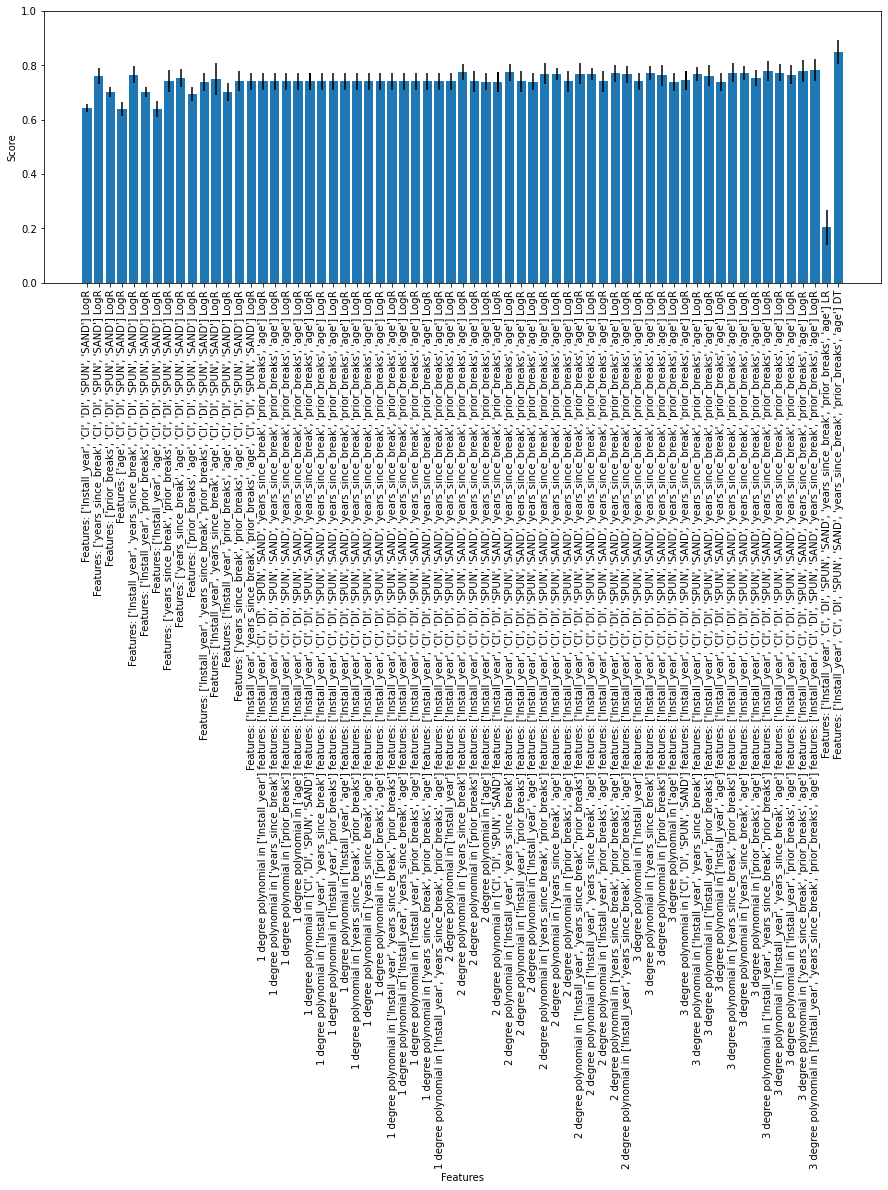

In [14]:
_,ax = plt.subplots(figsize=(15,5))

ax.bar(training,scores,yerr=difference)

ax.set_ylim(0,1)
plt.xticks(rotation=90)
ax.set_ylabel('Score')
ax.set_xlabel('Features')


In [15]:
clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=85)
col=xcols
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",clf)
])
pipe.fit(X_train[col],y_train)
scores.append(pipe.score(X_test[col],y_test))
min_cross_val.append(min(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
max_cross_val.append(max(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
training.append("Features: "+str(col)+" DT")

pipe.score(X_test[col],y_test)

0.7779171894604768

In [16]:
y_test_predicted = pipe.predict_proba(X_test)[:,1]

In [17]:
#Helpers
"""
Helper method to generate precision vs recall plot.

X_test_x0:   feature x0 of test data
th1:         cutoff to decide whether in domain or not.
distance:    a distance metrics, such as mahalanobis or GPR error bars

return:      precision, recall, accuracy of a cutoff th1
"""
def precision_recall(y_true, th, y_predicted ):
    TP = 0
    TN = 0
    FN = 0
    FP = 0

    total = len(y_true)
    for i in range(total):
        x = y_true[i]
        d = y_predicted[i]
        if x == 0:
            if d <  th:
                TP += 1
            else:
                FN += 1
        else:
            if d >= th:
                TN += 1
            else:
                FP += 1
    precision = TP/ (TP + FP)
    recall = TP / (TP + FN)
    
    return [precision, recall]




In [50]:
lower_bound = 0.00
upper_bound = 1.00
cutoffs = [x for x in np.arange(lower_bound, upper_bound, 0.01)]
x_axis = []
y_axis = []
cut=[]
for cutoff in cutoffs :
    try:
        precision,recall = precision_recall(list(y_test), cutoff,list(y_test_predicted))
        x_axis.append(recall*100) 
        y_axis.append(precision*100)
    except:
        x_axis.append(0) 
        y_axis.append(0)
    cut.append(cutoff*100)

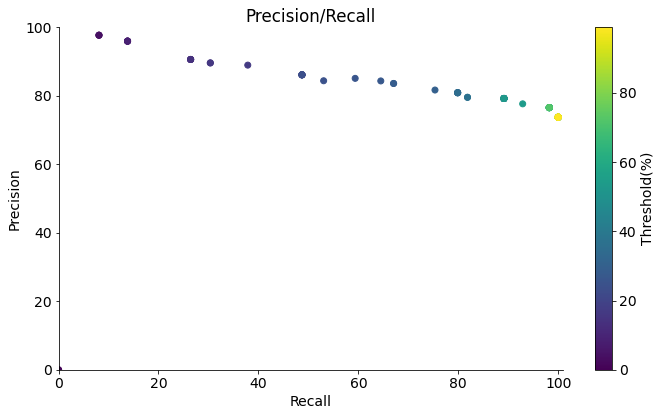

In [53]:
from matplotlib.lines import Line2D
matplotlib.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(10,6))
plt.scatter(x_axis, y_axis,c=cut)
ax.set_xlim(0,101)
ax.set_ylim(0,100)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title("Precision/Recall")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

plt.colorbar(label="Threshold(%)")

plt.savefig("precision_recall.png")

In [20]:
F1 = 2 * (np.array(x_axis) * np.array(y_axis)) / (np.array(x_axis) + np.array(y_axis))

/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [21]:
F1=list(np.nan_to_num(F1, nan=0))
F1.index(max(F1))

68

In [22]:
max(F1)

86.01036269430053

In [37]:
y_axis.index(max(y_axis))

2

In [24]:

split=[]
sample=[]
for i in range(20,100):
    clf = DecisionTreeClassifier(random_state=0,min_samples_split=i)
    sample.append(i)
    col=xcols
    pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",clf)
])
    pipe.fit(X_train[col],y_train)
    split.append(mean(cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]))
split.index(max(split))

1

Text(0, 0.5, 'Mean 12-fold Cross Validation Score')

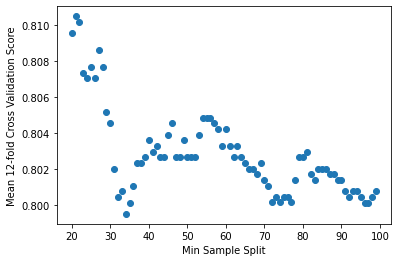

In [25]:
_,ax = plt.subplots()
ax.scatter(sample, split)

ax.set_xlabel('Min Sample Split')
ax.set_ylabel('Mean 12-fold Cross Validation Score')

In [26]:
leaf=[]
deviation=[]
sample=[]
for i in range(5,200,5): #Choose good round numbers
    clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=i)
    sample.append(i)
    col=xcols
    pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",clf)
])
    pipe.fit(X_train[col],y_train)
    scores= cross_validate(pipe, X_train[col], y_train, cv=12)["test_score"]
    leaf.append(mean(scores)*100)
    deviation.append((max(scores)-min(scores))/2*100)

leaf.index(max(leaf))

0

In [27]:
max(leaf)

81.771646096373

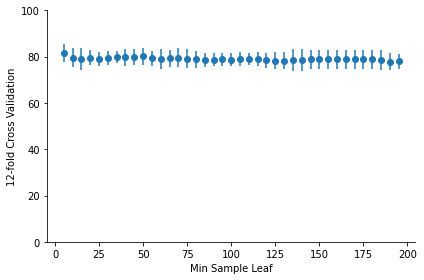

In [28]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
plt.errorbar(sample, leaf,yerr=deviation,linestyle="None")
ax.scatter(sample,leaf)
ax.set_ylim(0,100)
ax.set_xlabel("Min Sample Leaf")
ax.set_ylabel('12-fold Cross Validation')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("min_sample_leaf.png")

In [29]:

split_accuracy=[]
sample=[]
for i in range(20,100):
    clf = DecisionTreeClassifier(random_state=0,min_samples_split=i)
    sample.append(i)
    col=xcols
    pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",clf)
])
    pipe.fit(X_train[col],y_train)
    split_accuracy.append(pipe.score(X_test[col],y_test))
split_accuracy.index(max(split_accuracy))

12

Text(0, 0.5, 'Accuracy Score')

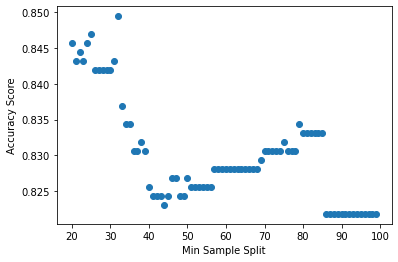

In [30]:
_,ax = plt.subplots()
ax.scatter(sample, split_accuracy)

ax.set_xlabel('Min Sample Split')
ax.set_ylabel('Accuracy Score')

In [31]:
leaf_accuracy=[]
sample=[]
for i in range(20,100):
    clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=i)
    sample.append(i)
    col=xcols
    pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",clf)
])
    pipe.fit(X_train[col],y_train)
    leaf_accuracy.append(pipe.score(X_test[col],y_test))

leaf_accuracy.index(max(leaf_accuracy))

7

Text(0, 0.5, 'Accuracy Score')

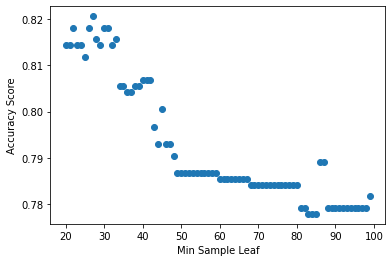

In [32]:
_,ax = plt.subplots()
ax.scatter(sample, leaf_accuracy)

ax.set_xlabel('Min Sample Leaf')
ax.set_ylabel('Accuracy Score')

In [33]:
y_test_predicted = pipe.predict_proba(X_test)[:,1]